Завдання 2.
Розробити за допомогою бібліотеки
surprise рекомендаційну систему.
Використати датасет movielens 100k
Використайте алгоритми
SVD, SVD pp
Найкращі параметри для всіх
алгоритмів підберіть за допомогою крос
валідації.
Обчисліть
середнє значення середньоквадратичної помилки RMSE для
кожного алгоритму на основі результатів крос валідації.
Виберіть оптимальний алгоритм. Зробіть візуалізацію.
Зробіть висновки.

Cross-validating SVD...
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9343  0.9267  0.9446  0.9343  0.9423  0.9365  0.0064  
Fit time          2.14    1.92    1.79    1.70    3.08    2.13    0.50    
Test time         0.25    0.40    0.19    0.28    0.21    0.27    0.08    
Cross-validating SVDpp...
Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9229  0.9217  0.9245  0.9188  0.9190  0.9214  0.0022  
Fit time          41.62   31.51   28.83   28.85   33.33   32.83   4.72    
Test time         10.59   5.45    5.16    14.57   6.12    8.38    3.67    


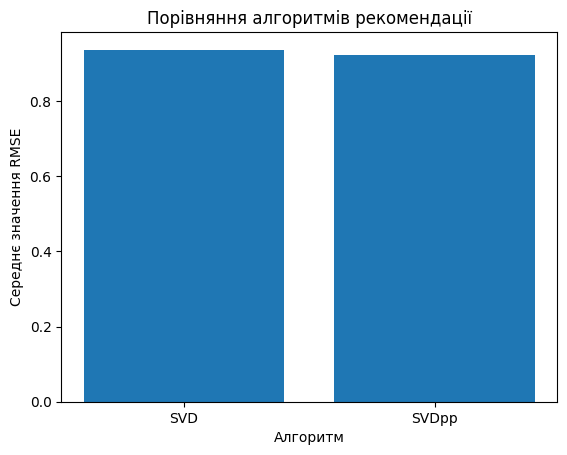


Найкращий алгоритм: SVDpp


In [7]:
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise import SVD, SVDpp
import matplotlib.pyplot as plt

# Визначення шкали рейтингів для читання датасету
reader = Reader(rating_scale=(1, 5))

# Завантаження датасету
data = Dataset.load_from_file('./ml-100k/u.data', reader=reader)

# Визначення алгоритмів
algorithms = [SVD(), SVDpp()]

# Крос-валідація та обчислення RMSE для кожного алгоритму
rmse_results = []
for algo in algorithms:
    print(f"Cross-validating {algo.__class__.__name__}...")
    results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)
    rmse_results.append(results['test_rmse'].mean())

# Відображення результатів крос-валідації
plt.bar([algo.__class__.__name__ for algo in algorithms], rmse_results)
plt.xlabel('Алгоритм')
plt.ylabel('Середнє значення RMSE')
plt.title('Порівняння алгоритмів рекомендації')
plt.show()

# Вибір найкращого алгоритму
best_algorithm = algorithms[rmse_results.index(min(rmse_results))]
print(f"\nНайкращий алгоритм: {best_algorithm.__class__.__name__}")
